# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
# Create new dataframe with cities
weather_df = pd.DataFrame(cities, columns = ['City'])

In [5]:
# Import google API key
from api_keys import g_key

# Set variables for weather API calls
weather_url = "http://api.openweathermap.org/data/2.5/weather"
params = {'appid':weather_api_key,
         'units':'imperial'}

#Set variables for counters. Each set to contain records 1-50.
record = 1
sets = 1

# Print output of API calls
print('Beginning Data Retrieval')
print('------------------------')

# Store weather data into dataframe for each city
for index, row in weather_df.iterrows():
    params['q'] = row['City']
    response = requests.get(weather_url, params).json()
       
    try:
        print(f"Processing Record {record} of Set {sets} | {row['City']}")
        weather_df.loc[index,'Lat'] = response['coord']['lat']
        weather_df.loc[index,'Lng'] = response['coord']['lon']
        weather_df.loc[index,'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index,'Humidity'] = response['main']['humidity']
        weather_df.loc[index,'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index,'Wind Speed'] = response['wind']['speed']
        weather_df.loc[index,'Country'] = response['sys']['country']        
        weather_df.loc[index,'Date'] = response['dt']
    except:
        print('City not found.  Skipping...')

# If number of records is multiple of 50, increment set number and reset city count
    if record%50 == 0:
        sets += 1        
        record = 0

# Increment city counter
    record += 1

print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | narsaq
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | umm durman
City not found.  Skipping...
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | colborne
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | bandarbeyla
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | oriximina
Processing Record 15 of Set 1 | escada
Processing Record 16 of Set 1 | attawapiskat
City not found.  Skipping...
Processing Record 17 of Set 1 | mocambique
City not found.  Skipping...
Processing Record 18 of Set 1 | ampanihy
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | bentiu
Processing Record 21 of Set 1 | sentyabrsk

Processing Record 34 of Set 4 | cabo san lucas
Processing Record 35 of Set 4 | margate
Processing Record 36 of Set 4 | alofi
Processing Record 37 of Set 4 | marsa matruh
Processing Record 38 of Set 4 | wakkanai
Processing Record 39 of Set 4 | coquimbo
Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | yagodnoye
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | karauzyak
City not found.  Skipping...
Processing Record 44 of Set 4 | erzin
Processing Record 45 of Set 4 | necochea
Processing Record 46 of Set 4 | finote selam
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | ibiruba
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | harper
Processing Record 1 of Set 5 | stromness
Processing Record 2 of Set 5 | chegdomyn
Processing Record 3 of Set 5 | axim
Processing Record 4 of Set 5 | emba
Processing Record 5 of Set 5 | quetzaltepec
City not found.  Skipping...
Processing Record 6 of Set 5 | bi

Processing Record 22 of Set 8 | touros
Processing Record 23 of Set 8 | samarai
Processing Record 24 of Set 8 | wajir
Processing Record 25 of Set 8 | katakwi
Processing Record 26 of Set 8 | jais
Processing Record 27 of Set 8 | yueyang
Processing Record 28 of Set 8 | genhe
Processing Record 29 of Set 8 | shimoda
Processing Record 30 of Set 8 | itoman
Processing Record 31 of Set 8 | kaura namoda
Processing Record 32 of Set 8 | chumikan
Processing Record 33 of Set 8 | roald
Processing Record 34 of Set 8 | jaguaruna
Processing Record 35 of Set 8 | baykit
Processing Record 36 of Set 8 | avera
Processing Record 37 of Set 8 | hamilton
Processing Record 38 of Set 8 | salinopolis
Processing Record 39 of Set 8 | flin flon
Processing Record 40 of Set 8 | wilmington island
Processing Record 41 of Set 8 | luderitz
Processing Record 42 of Set 8 | belaya gora
Processing Record 43 of Set 8 | nizhneangarsk
Processing Record 44 of Set 8 | gejiu
Processing Record 45 of Set 8 | panjab
Processing Record 46 

Processing Record 13 of Set 12 | ransang
Processing Record 14 of Set 12 | scottsburgh
City not found.  Skipping...
Processing Record 15 of Set 12 | krasnoselkup
Processing Record 16 of Set 12 | markova
Processing Record 17 of Set 12 | babanka
Processing Record 18 of Set 12 | polyarnyy
Processing Record 19 of Set 12 | palabuhanratu
City not found.  Skipping...
Processing Record 20 of Set 12 | fortuna
Processing Record 21 of Set 12 | kutum
Processing Record 22 of Set 12 | lasa
Processing Record 23 of Set 12 | itaituba
Processing Record 24 of Set 12 | galgani
City not found.  Skipping...
Processing Record 25 of Set 12 | dumas
Processing Record 26 of Set 12 | saryg-sep
Processing Record 27 of Set 12 | south shields
Processing Record 28 of Set 12 | suratgarh
Processing Record 29 of Set 12 | pitimbu
Processing Record 30 of Set 12 | san vicente
Processing Record 31 of Set 12 | stornoway
Processing Record 32 of Set 12 | taoudenni
Processing Record 33 of Set 12 | novobelokatay
Processing Record

In [6]:
# Remove cities not found, reset index, and export into csv file
weather_df.dropna(inplace=True)
weather_df.reset_index(inplace = True, drop = True)
weather_df.to_csv(output_data_file, index = False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.

In [8]:
weather_df.describe()

# No cities with humidity > 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,22.129979,19.980191,71.519982,66.629433,56.430851,7.544043,1.628093e+09
std,33.172111,89.107690,15.064453,22.311120,37.944390,5.445339,3.074481e+02
min,-54.800000,-175.200000,34.480000,1.000000,0.000000,0.000000,1.628092e+09
25%,-2.883875,-57.205600,61.672500,55.000000,20.000000,3.505000,1.628092e+09
50%,27.587500,22.541200,73.705000,71.000000,67.000000,6.300000,1.628093e+09
75%,50.684075,96.658200,81.305000,83.000000,94.000000,10.717500,1.628093e+09
max,78.218600,179.316700,117.820000,100.000000,100.000000,36.820000,1.628093e+09


## Latitude vs. Temperature Plot

In [9]:
# Create new dataframe 
clean_city_data = weather_df

# Create list of latitude values
latitude = clean_city_data['Lat']

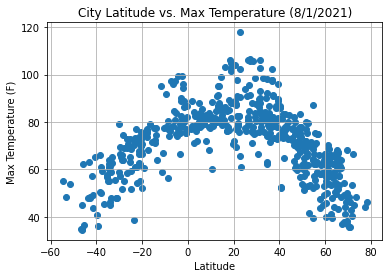

In [10]:
# Plot latitude vs temp
temp = clean_city_data['Max Temp']
plt.scatter(latitude,temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (8/1/2021)')
plt.grid()
plt.show()


In [ ]:
# The chart shows evidence of a relationship between latitude and temperature

## Latitude vs. Humidity Plot

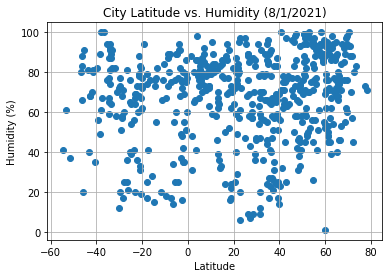

In [11]:
# Plot latitude vs. humidity
humidity = clean_city_data['Humidity']
plt.scatter(latitude,humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (8/1/2021)')
plt.grid()
plt.show()

In [ ]:
# There does not appear to be a relationship between latitude and humidity

## Latitude vs. Cloudiness Plot

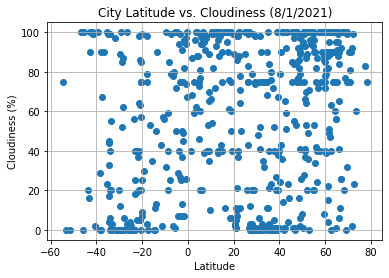

In [12]:
# Plot latitude vs cloudiness
cloudiness = clean_city_data['Cloudiness']
plt.scatter(latitude,cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (8/1/2021)')
plt.grid()
plt.show()

In [ ]:
# There does not appear to be a relationship between latitude and cloudiness

## Latitude vs. Wind Speed Plot

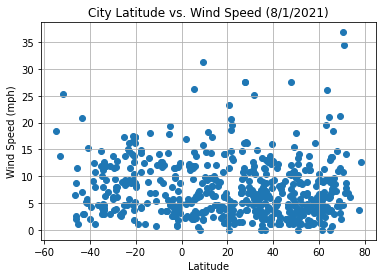

In [13]:
# Plot latitude vs wind speed
wind_speed = clean_city_data['Wind Speed']
plt.scatter(latitude,wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (8/1/2021)')
plt.grid()
plt.show()

In [ ]:
# There does not appear to be a relationship between latitude and wind speed

## Linear Regression

In [14]:
# Separate dataframe by Lat
northern_data = clean_city_data.loc[clean_city_data['Lat']>=0]
southern_data = clean_city_data.loc[clean_city_data['Lat']<0]

In [15]:
# Set variables for northern and southern latitudes
northern_latitude = northern_data['Lat']
southern_latitude = southern_data['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7092484472768288


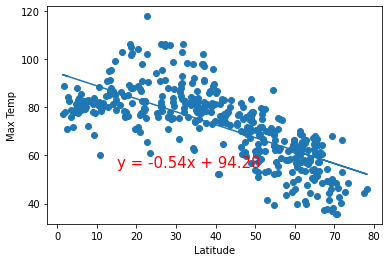

In [16]:
# Find max temp for northern latitudes
n_temp = northern_data['Max Temp']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
slope, int, rvalue = linregress(northern_latitude,n_temp)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(15,55),fontsize=15,color="red")
plt.show()

In [ ]:
# There is strong correlation between latitude and temperature.  The maximum temperature decreases as the latitude increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7989292369423076


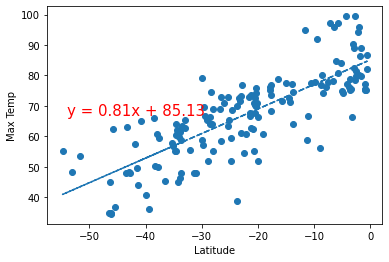

In [17]:
# Find max temp for southern latitudes
s_temp = southern_data['Max Temp']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
slope, int, rvalue = linregress(southern_latitude,s_temp)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-54,67),fontsize=15,color="red")
plt.show()

In [ ]:
# There is strong correlation between latitude and temperature.  The maximum temperature increases as the latitude approaches 0.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1163898583197417


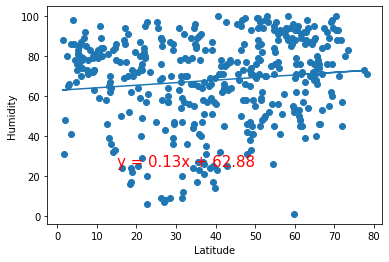

In [18]:
# Find humidity for northern latitudes
n_humidity = northern_data['Humidity']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
slope, int, rvalue = linregress(northern_latitude,n_humidity)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(15,25),fontsize=15,color="red")
plt.show()

In [ ]:
# There is weak correlation between latitude and humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.09277918201223943


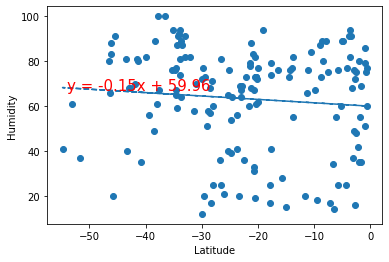

In [19]:
# Find humidity for southern latitudes
s_humidity = southern_data['Humidity']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
slope, int, rvalue = linregress(southern_latitude,s_humidity)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-54,67),fontsize=15,color="red")
plt.show()

In [ ]:
# There is weak correlation between latitude and humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0564408870311689


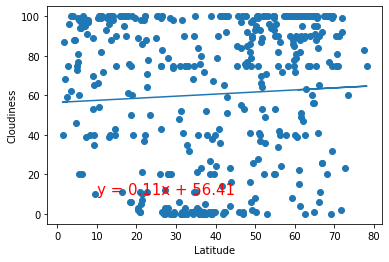

In [20]:
# Find cloudiness for northern latitudes
n_cloudiness = northern_data['Cloudiness']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
slope, int, rvalue = linregress(northern_latitude,n_cloudiness)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.show()

In [ ]:
# There is very weak correlation between latitude and cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05903542921198311


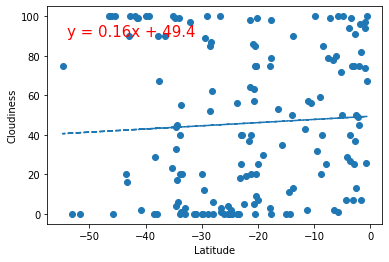

In [21]:
# Find cloudiness for southern latitudes
s_cloudiness = southern_data['Cloudiness']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
slope, int, rvalue = linregress(southern_latitude,s_cloudiness)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-54,90),fontsize=15,color="red")
plt.show()

In [ ]:
# There is very weak correlation between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.03261765865642605


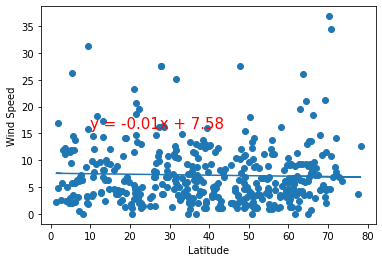

In [22]:
# Find wind speed for northern latitudes
n_wind = northern_data['Wind Speed']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
slope, int, rvalue = linregress(northern_latitude,n_wind)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(10,16),fontsize=15,color="red")
plt.show()

In [ ]:
# There is very weak correlation between latitude and wind speed

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0910938656498047


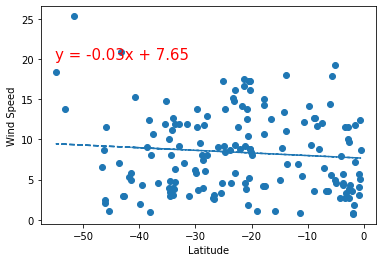

In [23]:
# Find wind speed for southern latitudes
s_wind = southern_data['Wind Speed']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
slope, int, rvalue = linregress(southern_latitude,s_wind)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.show()

In [ ]:
# There is very weak correlation between latitude and wind speed